Ben Trey<br>
APM115: Mathematical Modeling<br>
Homework 2 (group)<br>
2/18/2021<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<b>Group component (To be completed in groups of 3 or 4. Members of the same group
can turn in the same code and write-up. Please list the names of your group
members.)</b>

<h1>Problem 8</h1>

<i>Climate Complete the climate exercise. Turn in the code and a brief
description of your findings. Note that when the parameters are changed slowly, the
system has enough time to adjust and can stay close to a fixed point corresponding to the
parameters at the time.</i>

<i>1. Use climate_temperature_tendency.m to plot the temperature
tendency (dT/dt) as a function of temperature for the
temperature range of [220, 300] Kelvin.</i><br><br>

In [25]:
sigma=5.67e-8
H=1e8

def alpha(T):
    if T>273:
        return 0.3
    elif T >= 263:
        return 0.3*(1+(273-T)/10)
    else:
        return 0.6

def climate_tendency(T, S0):
    dTdt = ((1-alpha(T))*S0/4-sigma*T**4)/H
    return dTdt

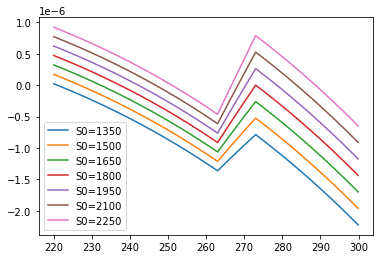

In [26]:
T = np.arange(220,300,0.1)
S = np.arange(1350,2300,150)
for s in S:
    y = [climate_tendency(t,s) for t in T] 
    plt.plot(T, y, label="S0="+str(s))

plt.legend()
plt.show()

<i>2. Find the fixed points and identify their stability</i>

Assuming the fixed temperature is above $273 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s = \left(\frac{1-\alpha}{4 \sigma} S_0\right)^\frac{1}{4} \approx 287 K$.

In [38]:
fixed_point = ((1-0.3)/4/sigma*2200)**0.25
print("fixed point: ", fixed_point)
print("climate tendency: ", climate_tendency(fixed_point, 2200))


fixed point:  287.0578433211224
climate tendency:  -1.7053025658242403e-21


Assuming the fixed temperature is above $263 \mathrm{K}$ but below $273 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s \approx 267 K$.

In [41]:
#Newton's Method
old_T = 263
delta=0.001
accuracy=0.001
keep_going = True
while keep_going:
    diff = (climate_tendency(old_T+delta,2200)-climate_tendency(old_T,2200))/delta
    new_T = old_T-climate_tendency(old_T,2200)/diff
    keep_going = abs((old_T-new_T)/new_T)>accuracy
    old_T = new_T
new_T
    

267.17705123335696

Assuming the fixed temperature is above $263 \mathrm{K}$, at the fixed point $\frac{dT_s}{dt} = 0 \implies T_s = \left(\frac{1-\alpha}{4 \sigma} S_0\right)^\frac{1}{4} \approx 250 K$.

In [31]:
fixed_point = ((1-0.6)/4/sigma*2200)**0.25
print("fixed point: ", fixed_point)
print("climate tendency: ", climate_tendency(fixed_point, 2200))


fixed point:  249.5800718944141
climate tendency:  -2.842170943040401e-22


Looking at the slope of the fixed points when they intersect the T-axis the points at $249 \mathrm{K}$ and $287 \mathrm{K}$ are stable, and the point at $267 \mathrm{K}$ is unstable. 

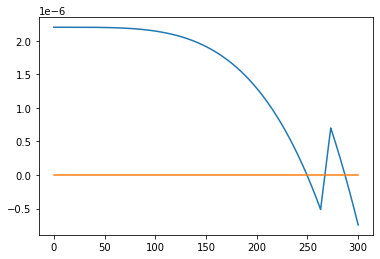

In [28]:
T = np.arange(0,300,0.01)
y = [climate_tendency(t,2200) for t in T] 
plt.plot(T, y)
plt.plot([0,300],[0,0])
plt.show()

<i>3. Imagine that we are at the warm stable fixed point. If we slowly
(e.g. over a period of 30000 days) reduce the solar constant
towards 70% of its current value (thought to be the value early
in the solar system history) and compute Ts
. Then gradually
increase the solar constant towards 130% of its current value
(e.g. over a period of 60000 days) and compute Ts
. What do you
see? Can you explain the behavior (hint: graph the two righthand-side terms of the energy balance equation as functions of
S0)? (Note that with the units used here dTs/dt is in units of
Kelvin/second)</i>

In [72]:
sigma=5.67e-8
H=1e8 

def alpha(T):
    if T>273:
        return 0.3
    elif T >= 263:
        return 0.3*(1+(273-T)/10)
    else:
        return 0.6

def climate_tendency(T, S0):
    dTdt = ((1-alpha(T))*S0/4-sigma*T**4)/H
    return dTdt

def coef(days, time, change):
    return 1+change*time/days/24/3600

def solve_4(T0,func,days,change):
    dt = 10**4
    t = np.arange(0,days*24*3600,dt)
    rows = len(t)
    T = np.zeros([rows,2])
    T[0] = [T0,func(T0,2200)]
    for n in range(rows-1):
        k1 = func(T[n,0],coef(days,t[n],change)*2200)
        k2 = func(T[n,0]+dt/2*k1, coef(days,t[n]+dt/2,change)*2200)
        k3 = func(T[n,0]+dt/2*k2, coef(days,t[n]+dt/2,change)*2200)
        k4 = func(T[n,0]+dt*k3, coef(days,t[n]+dt,change)*2200)
        T[n+1] = T[n] + 1/6*dt*(k1+2*k2+2*k3+k4)
    return t, T[:,0]

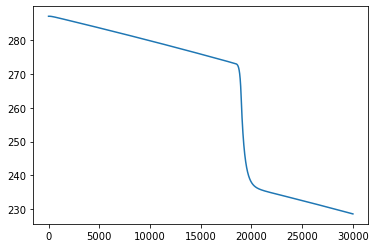

In [73]:
t, T = solve_4(287, climate_tendency, 30000, -0.3)
plt.plot(t/3600/24,T)
plt.show()

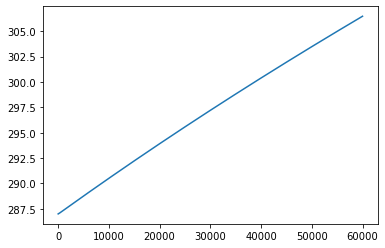

In [74]:
t, T = solve_4(287, climate_tendency, 60000, 0.3)
plt.plot(t/3600/24,T)
plt.show()

<i>4. Given the complexity of the climate system, what is the value of
such a simple model?</i>

<h1>Problem 9</h1>

<i>9. (20 points) Stochastic population. Modify the code shown in class
(stochastic_simulation_logistic.m) to study the evolution of the probability distribution
with time. Note that the distribution that we derived analytically in the notes is the
equilibrium probability distribution, toward which the probability distribution will
evolve.
To do so, make a large number (say 5000) of realizations of the same system. While the
different realizations have identical parameters, because we are dealing with stochastic
systems (and we are using a random number generator to simulate it), the different
realizations will evolve differently.
Now run the 5000 realizations forward in time for 10000 time-steps. After every 100
time-steps, record the distribution of population among the 5000 realizations and plot it.
You could do this for every time step but doing this after every 100 time-steps reduces
the number of plots that you make.
Observe the evolution of the probability distributions.
Turn in your code and a brief report with plots of some representative probability
distributions and a brief discussion of what are shown. 
</i>

In [79]:
R=1
K=50
dimP=10*K
mu=R/K
lambda_var=R*(1-(1/K))
#print(lambda_var)
nsteps=2500
N=np.zeros(nsteps)
N[0]=3
t=0
dt=10**(-3)

In [80]:
while t<nsteps-1 and N[t]>0:
    r=np.random.rand(1)
    if r<lambda_var*N[t]*dt:
        N[t+1]=N[t]+1
    elif r<(lambda_var*N[t]+mu*N[t]*(N[t]-1))*dt:
        N[t+1]=N[t]-1
    else:
        N[t+1]=N[t]
    t=t+1

Text(0.5, 0, 'Time Steps')

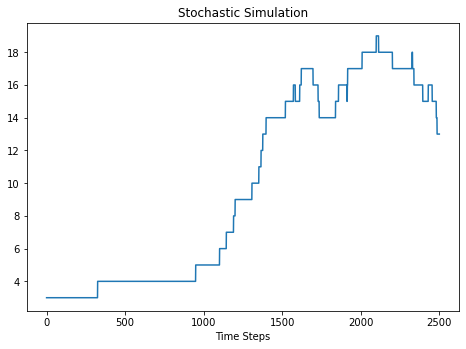

In [81]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(np.arange(nsteps),N)
ax.set_title('Stochastic Simulation')
ax.set_xlabel('Time Steps')

<h1>Problem 10</h1>

<i>10. (Extra credit, 10 points) Valentine’s day Valentine’s day is around the corner. A
local florist comes to you to consult how many roses she should order. If she orders too
many, roses are perishable and those that not sold by Valentine’s day’s end will be lost. If
she orders too few, she will lose valuable sales opportunities; sales for the Valentine’s
day represent a significant portion of the annual sales for the florist. What factors would
you consider, what information would you gather, what approaches (deterministic or
probabilistic) would you take towards building a mathematical model to help the florist?
You are only asked to sketch out some ideas; no equations are necessary at this stage.
Happy Valentine’s Day, everyone!</i>